In [165]:
import pandas as pd
import matplotlib.pyplot as plt

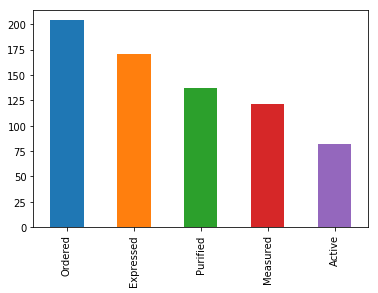

In [168]:
ordered = pd.read_excel('Tracking of variants.xlsx','Library')
expression = pd.read_excel('Tracking of variants.xlsx','Sheet2')
measured = pd.read_csv('../../../../RO/3PG Coupled Assay/EPPS_Assays/all_GCM_variants.csv')
rates = pd.read_csv('../../../../RO/3PG Coupled Assay/EPPS_Assays/clean_variant_data_42_83_20190531.csv')
all_data = ordered.merge(expression,left_on='Internal ID',right_on='Variant',how='left')
all_data.groupby('Internal ID')['SDSPage'].max().sum()
all_data[all_data['Variant'].isna()]
#ordered['Internal ID'].nunique()
#measured.Variant.nunique()
#
#ordered.set_index('Internal ID',inplace=True)
ordered.set_index('Internal ID',inplace=True)
expression['Expressed'] = True
ordered['Expressed'] = expression.groupby('Variant').Expressed.mean()

ordered['Purified'] = expression.groupby('Variant')['SDSPage'].max()
ordered.loc[ordered['Purified'] == 1,'Purified'] = True
ordered.loc[ordered['Purified'] == 0,'Purified'] = False

#
#ordered.merge(expression.groupby('Variant')['SDSPage'].max(), left_index=True,right_index=True)
ordered['measured'] = measured.groupby('Variant')['fname'].count() > 0
ordered.loc[ordered.measured.isna(),'measured'] =False
ordered['max rate'] = rates.groupby('Variant')['norm_rate'].max()
ordered['mean rate'] = rates.groupby('Variant')['norm_rate'].mean()
#ordered[ordered['max rate']>0.5]

data = pd.Series([ordered.index.nunique(),ordered.Expressed.sum(),ordered.Purified.sum(),ordered[ordered.Purified==True].measured.sum(),(ordered['max rate']>0.5).sum()],index=['Ordered','Expressed','Purified','Measured','Active'])
data.plot.bar()
plt.savefig('variant_tracking.png',dpi=300)
ordered.to_csv('variant_tracking.csv')

In [179]:
ordered.loc[(ordered.Purified==False)&(ordered['max rate']>0.5),'Purified']= True

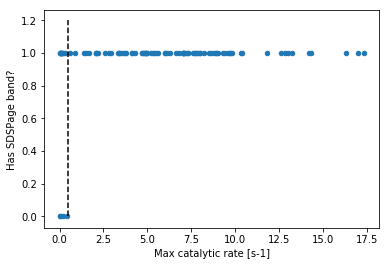

In [193]:
ordered.loc[ordered.Purified==True,'flag'] = 1
ordered.loc[ordered.Purified==False,'flag'] = 0
ordered.plot.scatter(x='max rate',y='flag')
#ordered.loc[ordered.Purified==False]
plt.vlines(0.5,0,1.2,linestyles='--')
ax = plt.gca()
ax.set_ylabel('Has SDSPage band?')
ax.set_xlabel('Max catalytic rate [s-1]')
plt.savefig('rate cutoff.png',dpi=300)

In [135]:
ordered = pd.read_excel('Tracking of variants.xlsx','Library')
expression = pd.read_excel('Tracking of variants.xlsx','Sheet2')
expression['Expressed'] = True
ordered.set_index('Internal ID',inplace=True)
ordered['Expressed'] = expression.groupby('Variant').Expressed.mean()
ordered

,Identifier,Expressed
Internal ID,,
RBC4_74,TARA_037.SAMEA2619970.600.0.22-1.6_27685_12,True
RBC4_76,gi|845405|gb|AAC37234.1|,NaN
RBCSeed_23,gi|75282237|sp|Q41407.1|RBLL_SYMSP,True
RBC4_16,gi|1120376324|ref|WP_073240254.1|,True
RBC4_30,gi|668346614|emb|CDW95835.1|,True
RBC4_80,gi|1129192970|gb|OLP97681.1|,NaN
RBC_82,gi|966788972|ref|WP_058555948.1|,True
RBC_1,gi|504593331|ref|WP_014780433.1|,True
RBC4_17,gi|521992112|ref|WP_020503383.1|,True
